In [19]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, svm, neighbors
from joblib import dump, load

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def cifar10_plot(im):
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))

    plt.imshow(img) 
    plt.show()

In [40]:
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x = unpickle('data_batch_1')
data = np.array(x[b'data'])
labels = np.array(x[b'labels'])

x = unpickle('data_batch_2')
data = np.append(data, np.array(x[b'data']), axis=0)
labels = np.append(labels, np.array(x[b'labels']), axis=0)

x = unpickle('data_batch_3')
data = np.append(data, np.array(x[b'data']), axis=0)
labels = np.append(labels, np.array(x[b'labels']), axis=0)

x = unpickle('data_batch_4')
data = np.append(data, np.array(x[b'data']), axis=0)
labels = np.append(labels, np.array(x[b'labels']), axis=0)

x = unpickle('data_batch_5')
data = np.append(data, np.array(x[b'data']), axis=0)
labels = np.append(labels, np.array(x[b'labels']), axis=0)

print(labels.shape)

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, labels, test_size=0.4)

(50000,)


In [39]:
# Train the classifier
# clf = neighbors.KNeighborsClassifier(n_neighbors=50)
clf = svm.SVC(kernel='rbf', verbose=True)
clf.fit(xtrain, ytrain)

# Save the trained classifier
dump(clf, './svm_models/poly.joblib') 
print("Finished training & saved model")

[LibSVM]Finished training & saved model
Accuracy 0.5315


In [41]:
# Test the accuracy
accu = clf.score(xtest, ytest)
print("Accuracy {}".format(accu))

Accuracy 0.6699


True
Sample Image car
Predicted Image car


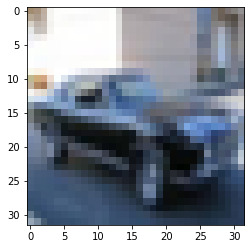

In [17]:
# Testing the algorithm (Loading the trained classifier)
clf = load('./svm_models/poly.joblib') 

# Select the image to test
index = 46
example_image = xtest[index, :].reshape(1,-1)

prediction = clf.predict(example_image)
print(prediction[0] == ytest[index])
print("Sample Image {}".format(classesName[ytest[index]]))
print("Predicted Image {}".format(classesName[prediction[0]]))

img = xtest[index, :]
cifar10_plot(img)